 # Daiabetes- Patient Risk Healthcare 
 
## Description


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Dataset url: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

###### Attribute Information:

- Number of times pregnant

- Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- Diastolic blood pressure (mm Hg)

- Triceps skin fold thickness (mm)

- 2-Hour serum insulin (mu U/ml)

- Body mass index (weight in kg/(height in m)^2)

- Diabetes pedigree function

- Age (years)

- Class variable (0 or 1)

What is diabetes ?

Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

What are the different types of diabetes? The most common types of diabetes are type 1, type 2, and gestational diabetes.

Type 1 diabetes If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

Type 2 diabetes If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

Gestational diabetes Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

In [1]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import svm

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Data Collection and Analysis

### Diabetes Dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Describing data in the dataset into min, max, mean & stdv
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observation: 

In the above table, the min value of columns: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' is Zero. It is clear that this values can't be Zero. So imputing mean values of these respective columns instead of Zero.

## Data Cleaning

In [6]:
data.shape

(768, 9)

In [7]:
# Droping Duplicates
data = data.drop_duplicates()
data.shape

(768, 9)

- Before and after drop the duplicates the dataset has same shape which means no duplicates in the dataset

In [8]:
data.isnull().values.any()

False

 - Dataset contains :
     - 768 rows and 9 features
     - No missing values and duplicate entries
 

## Benchmark model

In [9]:
# Set features (X) and the target variable (y)
X = data.drop("Outcome", axis = 1)
y = data.Outcome

# Split the data into training set and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       151
           1       0.57      0.62      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.72      0.71      0.71       231



<Axes: >

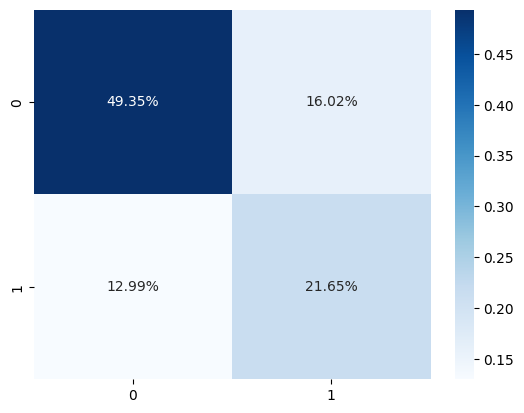

In [10]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train the XGBoost classifier
classifier = XGBClassifier(random_state=42, n_estimators=10000, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, objective='binary:logistic')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


######  Can minimum value of below listed columns be zero (0)?
- Since the data set is related to the health sector, some values need to be examined more carefully. There are many values whose observation values cannot be 0. A value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose
BloodPressure
SkinThickness
Insulin
BMI

- Trying to replace Zero values with the mean of the respective feature

#### Checking the number of Zero values in the dataset

In [12]:
print('No. of Zero values in Glucose: ', data[data['Glucose']==0].shape[0])
print('No. of Zero values in BloodPressure: ', data[data['BloodPressure']==0].shape[0])
print('No. of Zero values in SkinThickness: ', data[data['SkinThickness']==0].shape[0])
print('No. of Zero values in Insulin: ', data[data['Insulin']==0].shape[0])
print('No. of Zero values in BMI: ', data[data['BMI']==0].shape[0])

No. of Zero values in Glucose:  5
No. of Zero values in BloodPressure:  35
No. of Zero values in SkinThickness:  227
No. of Zero values in Insulin:  374
No. of Zero values in BMI:  11


In [13]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### Replacing the zero values with means

In [14]:
data['Glucose'] = data.groupby('Outcome')['Glucose'].apply(lambda x: x.replace(0, round(x.mean(), 0)))
data['BloodPressure'] = data.groupby('Outcome')['BloodPressure'].apply(lambda x: x.replace(0, round(x.mean(), 0)))
data['SkinThickness'] = data.groupby('Outcome')['SkinThickness'].apply(lambda x: x.replace(0, round(x.mean(), 0)))
data['Insulin'] = data.groupby('Outcome')['Insulin'].apply(lambda x: x.replace(0, round(x.mean(), 0)))
data['BMI'] = data.groupby('Outcome')['BMI'].apply(lambda x: x.replace(0, round(x.mean(), 2)))

In [15]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.640000,70.768000,25.22400,101.360000,30.849600,0.429734,31.190000
1,4.865672,142.309701,75.063433,29.38806,151.828358,35.404776,0.550500,37.067164


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691406,72.266927,26.677083,118.971354,32.439167,0.471876,33.240885,0.348958
std,3.369578,30.460693,12.117110,9.601847,93.535785,6.880462,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,69.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Save a pandas Dataframe to a CSV file (To Create an Dashboard using Tableau)

In [17]:
data.to_csv('Updated_Diabetes.csv', index=False)

## Data Visualization

###### Starting with Target Feature

- It's a Binary Classification (Supervised Learning) Problem

0    500
1    268
Name: Outcome, dtype: int64


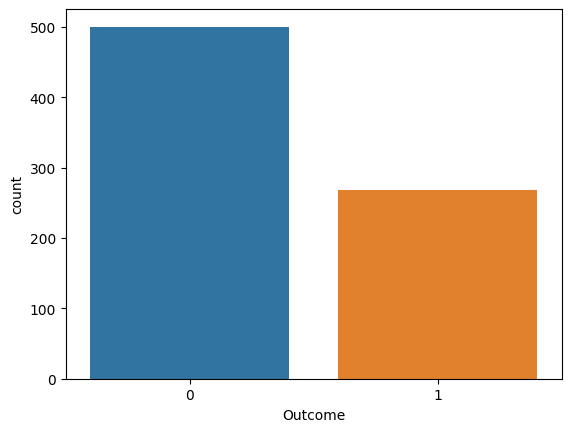

In [18]:
sns.countplot(x=data["Outcome"])
print(data.Outcome.value_counts())

##### Observation:
- Out of total 768 people, 268 are diabetic(positive) and 500 are non-diabetic(negative)
- Outcome feature represents, 1: Diabetes positive, 0: Diabetes negative
- The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who have diabetes
    

### Histograms: 
- Histograms are one of the most common graphs used to display numeric data
- Distribution of the data tells wheather the data is normally distributed or if it's skewed(to the left or right)

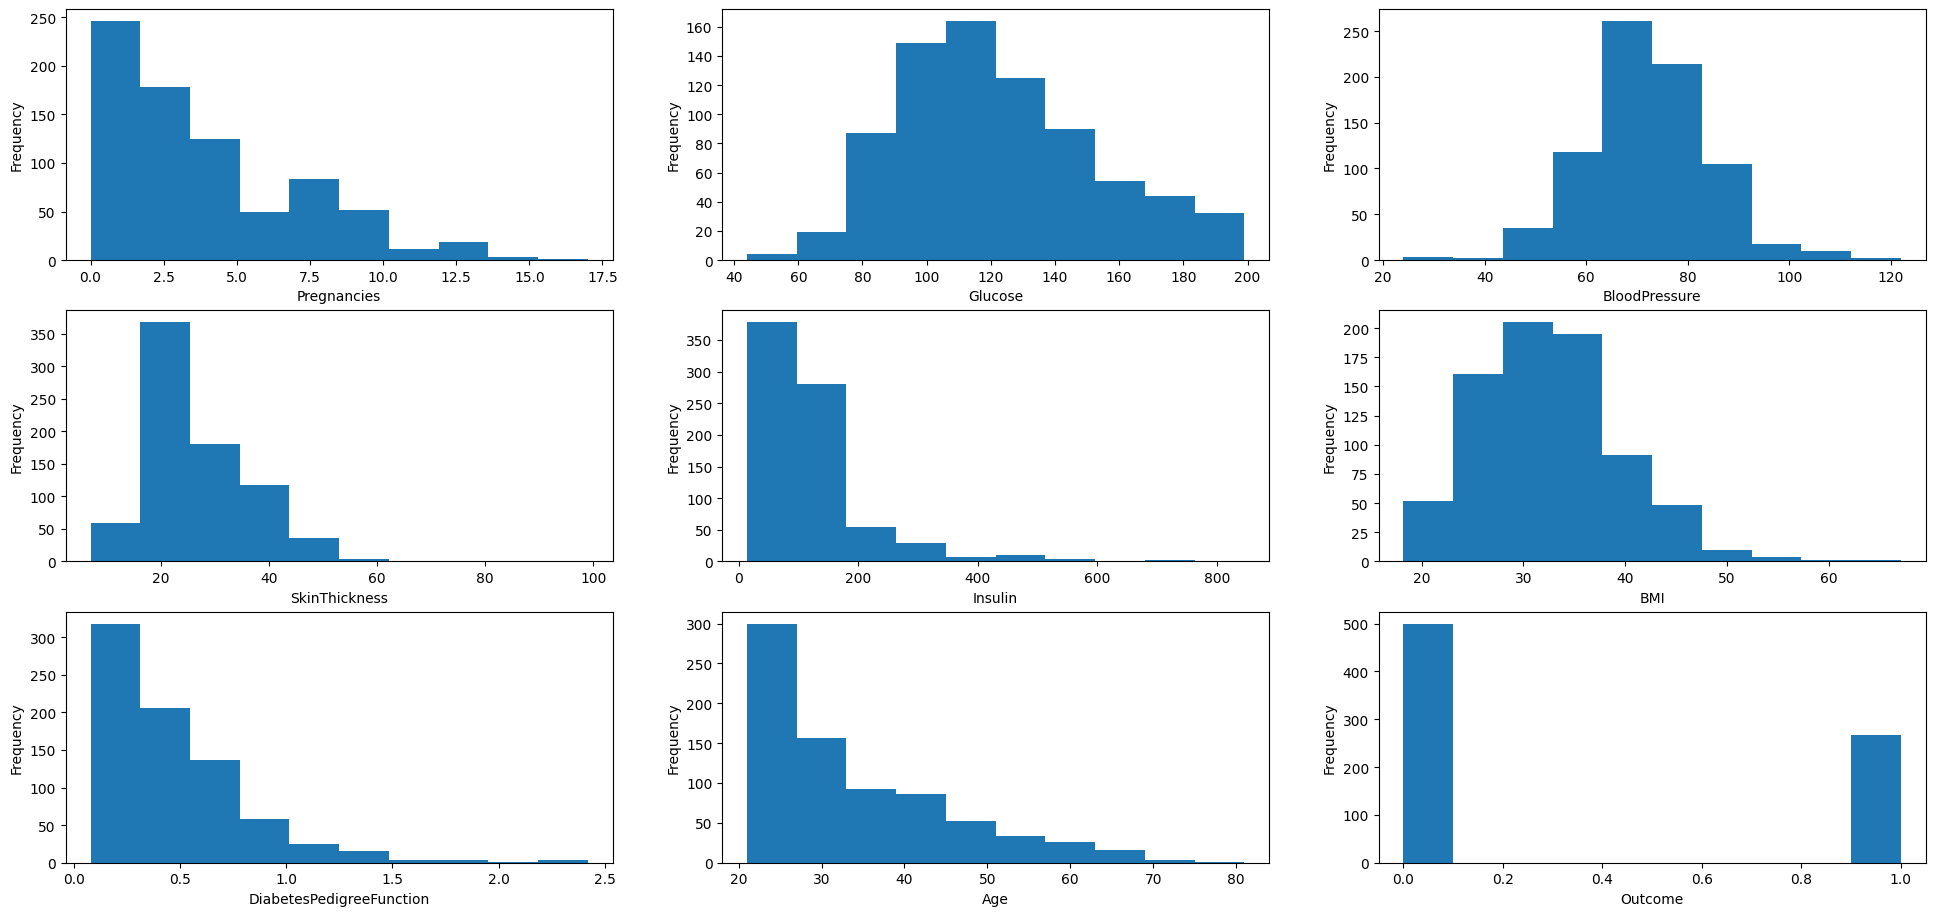

In [19]:
fig = plt.figure(figsize=(24,15))
i = 0
for column in data:
    sub = fig.add_subplot(4,3,i+1)
    sub.set_xlabel(column)
    data[column].plot(kind='hist')
    i = i + 1

### Pairplot
- It's great way to create scatter plot between all features
- To understand replationship between two variables(like correlation matrix)

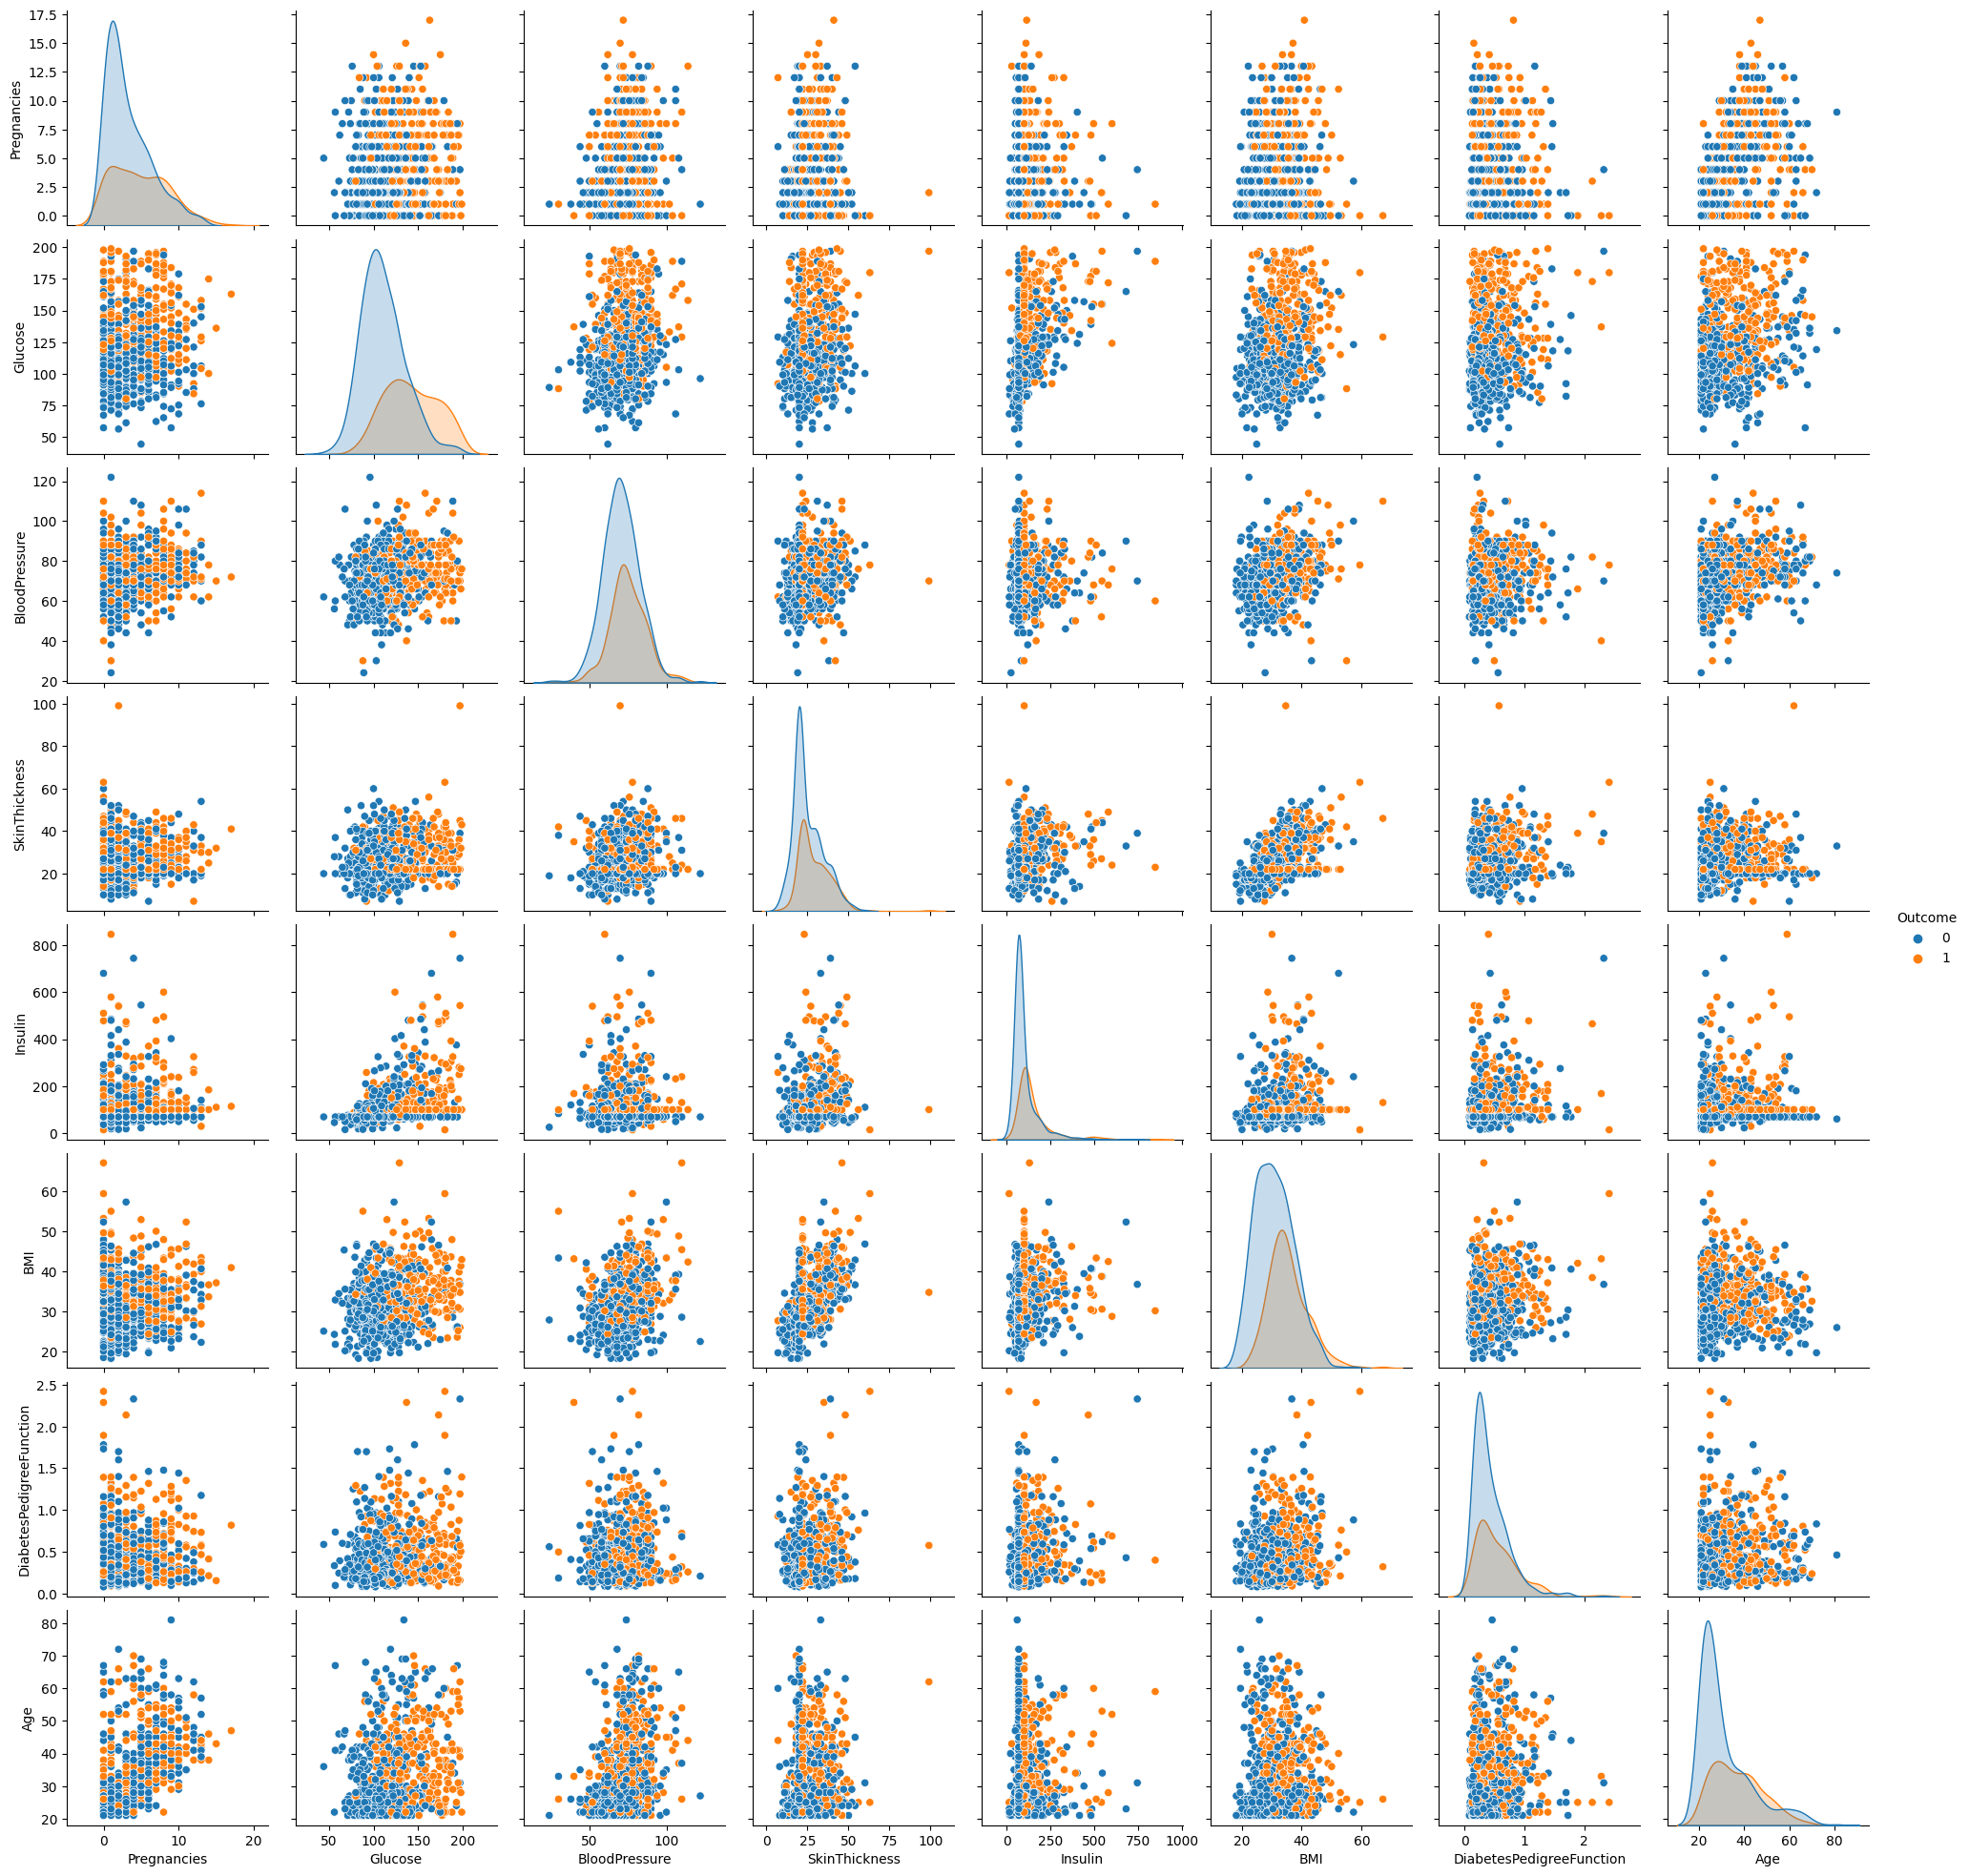

In [20]:
sns.pairplot(data, hue = 'Outcome')

### Analyzing relationship between variables

##### correlation anlysis

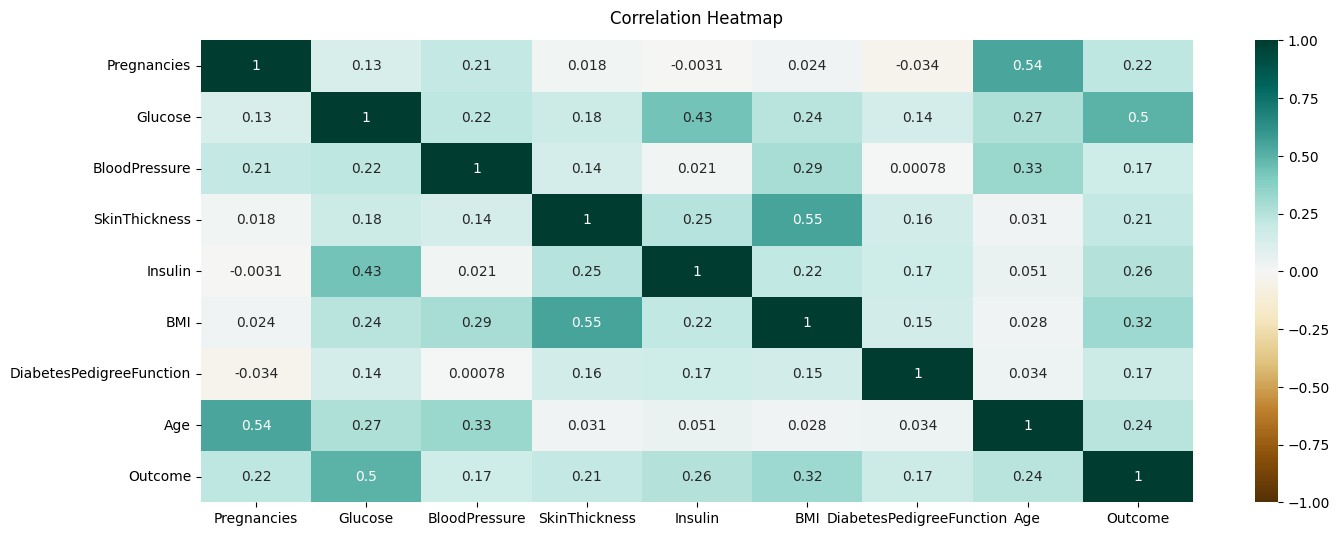

In [21]:
# Visualization the correlation of the dataset using seaborn 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

- There is not highly correlated feature in this data set.

#### Checking Outliers

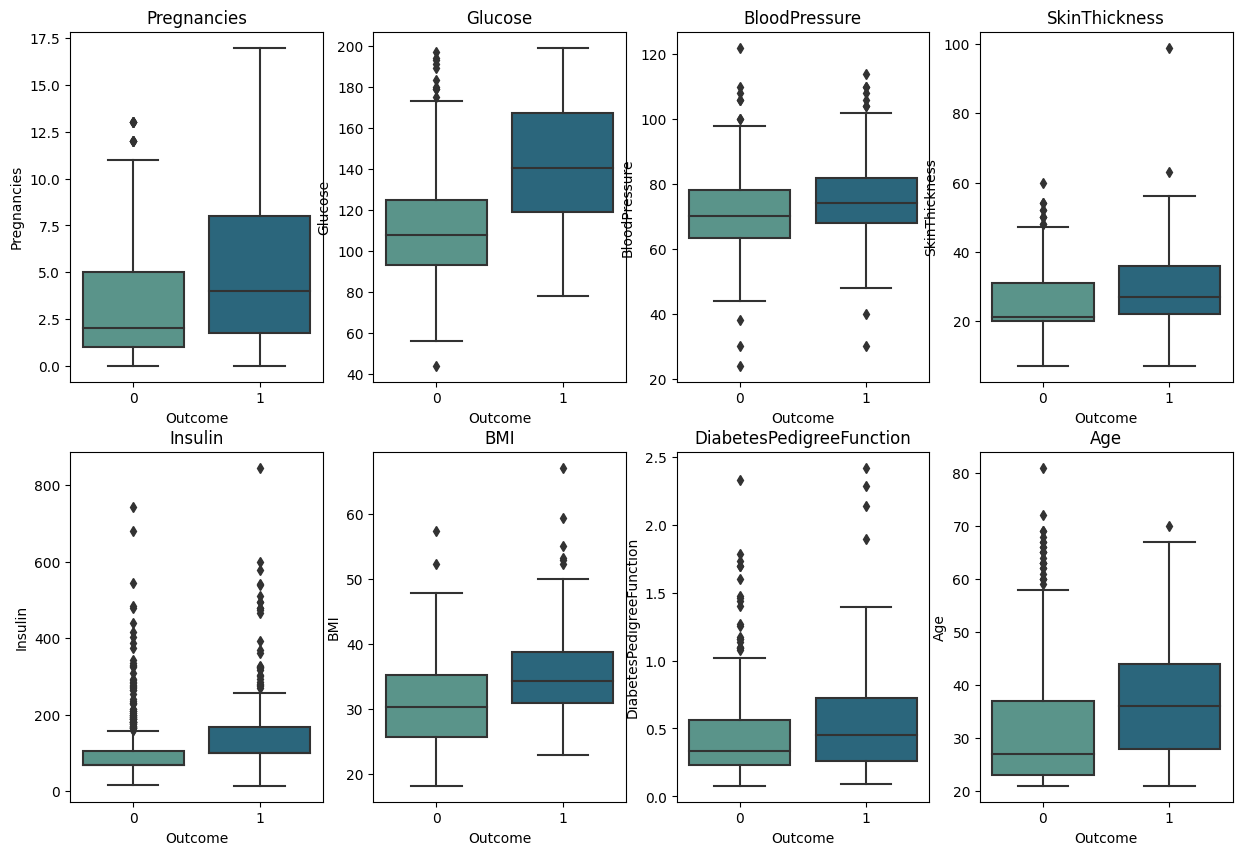

In [22]:
X_ = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(15, 10))

for i in range(len(X_)):
    column = X_[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.boxplot( x= 'Outcome', y = column, data=data, palette = 'crest')
    sub.set_title(column)

### Handling outliers

In [23]:
#creating a function to clear outlier data in the dataset.
def cleanColumn(data, column, thr=2):
    column_desc = data[column].describe()
    
    q3 = column_desc['75%']
    q1 = column_desc['25%']
    IQR = q3 - q1
    
    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR
    
    filter_clm_bottom = bottom_limit_clm < data[column]
    filter_clm_top = data[column] < top_limit_clm
    
    filters = filter_clm_bottom & filter_clm_top
    
    data = data[filters]
    
    print("{} rows of dataset after cleaning column {}".format(data.shape[0], column))
    
    return data


In [24]:
# I apply the function to the dataset.
for i in data.columns:
    data = cleanColumn(data,i)

767 rows of dataset after cleaning column Pregnancies
767 rows of dataset after cleaning column Glucose
762 rows of dataset after cleaning column BloodPressure
758 rows of dataset after cleaning column SkinThickness
702 rows of dataset after cleaning column Insulin
700 rows of dataset after cleaning column BMI
686 rows of dataset after cleaning column DiabetesPedigreeFunction
684 rows of dataset after cleaning column Age
684 rows of dataset after cleaning column Outcome


In [25]:
print("New data shape: ", data.shape)

New data shape:  (684, 9)


- Handling outliers by using interquartile range. IQR is a measure of variability in a dataset, based on the range between the first quartile (Q1) and the third quartile (Q3). The IQR is commonly used as a robust method for identifying and removing outliers from a dataset.
- After handling the Outliers the new dataset contains 674 patients information

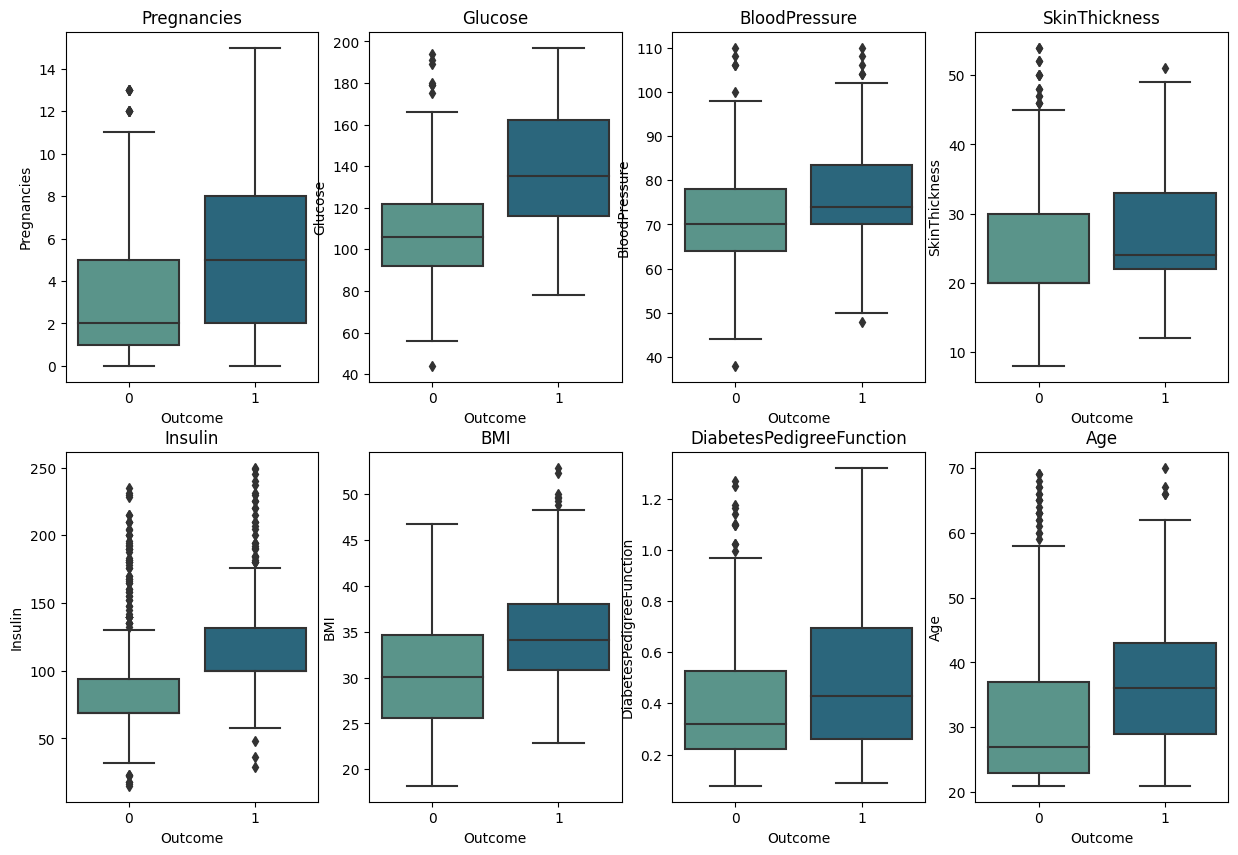

In [26]:
X_ = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(15, 10))

for i in range(len(X_)):
    column = X_[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.boxplot( x= 'Outcome', y = column, data=data, palette = 'crest')
    sub.set_title(column)

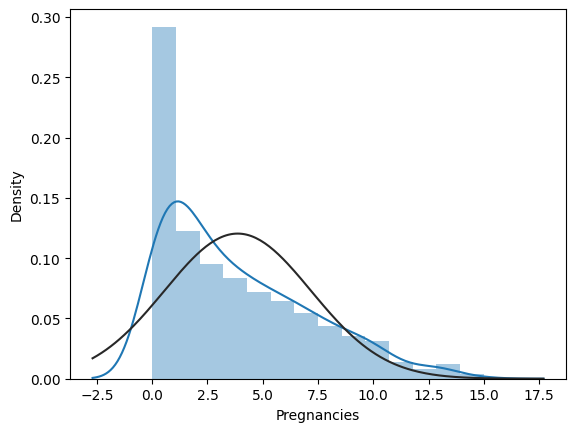

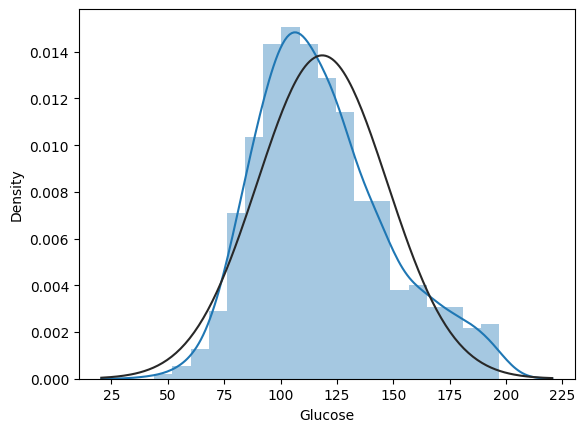

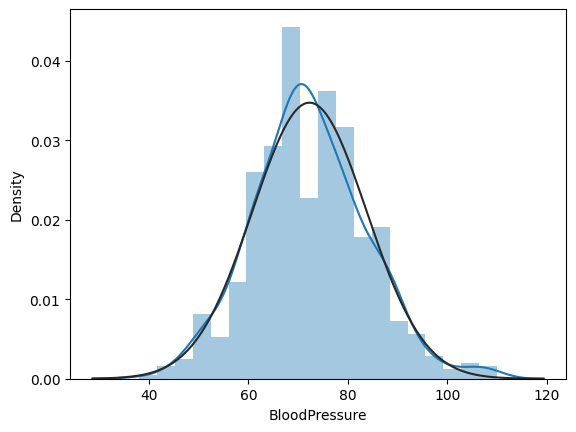

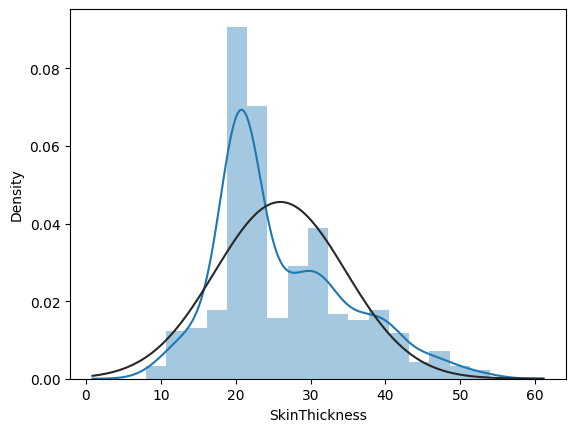

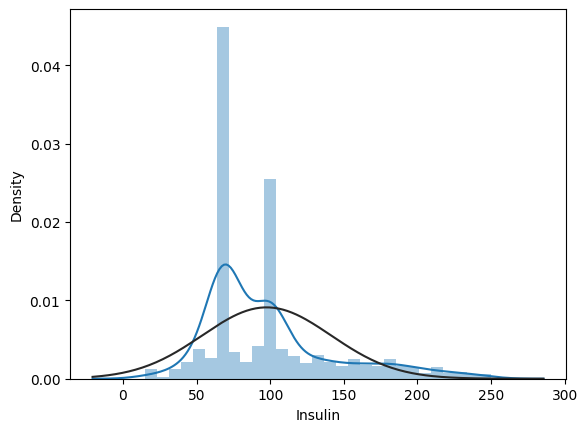

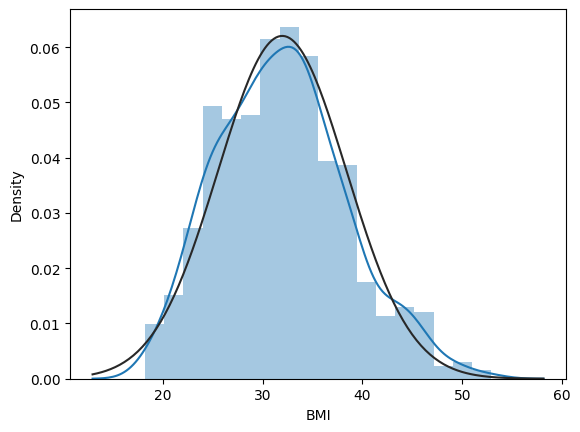

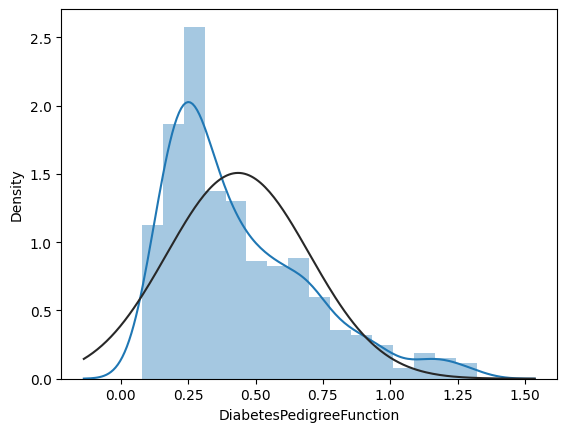

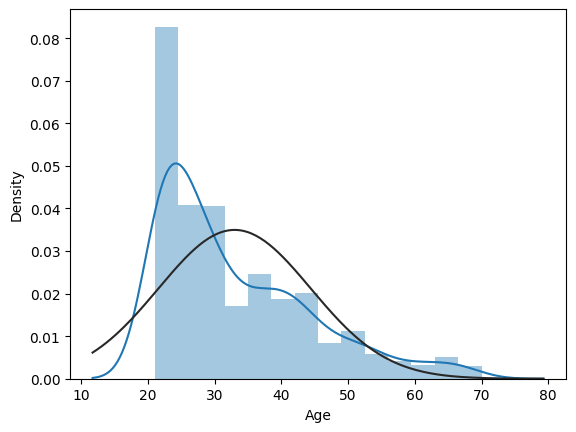

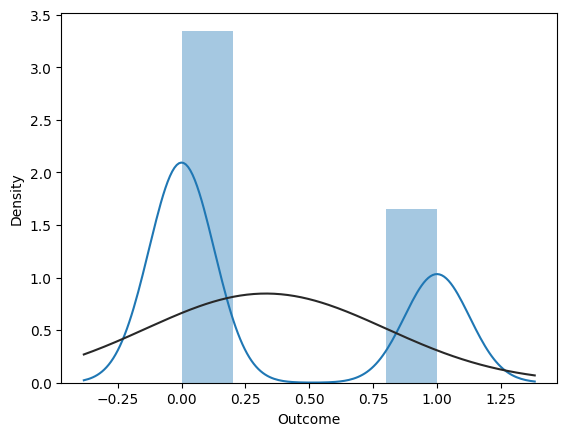

In [27]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i], fit = norm)
    plt.show()

# Feature Engineering

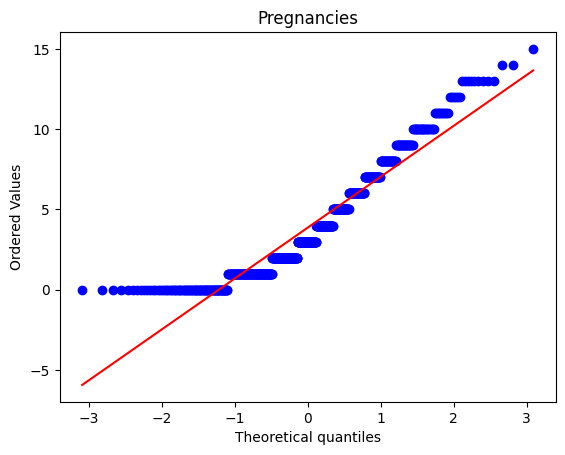

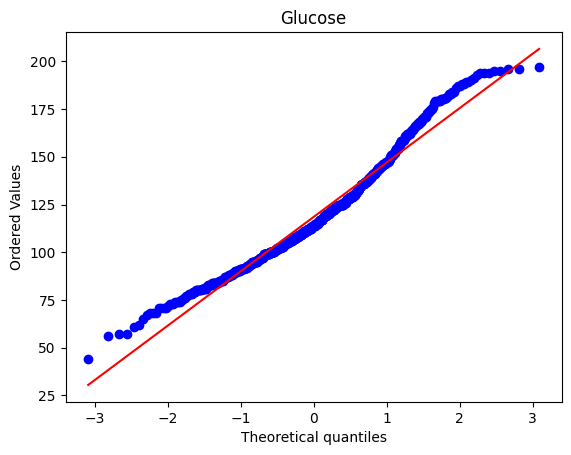

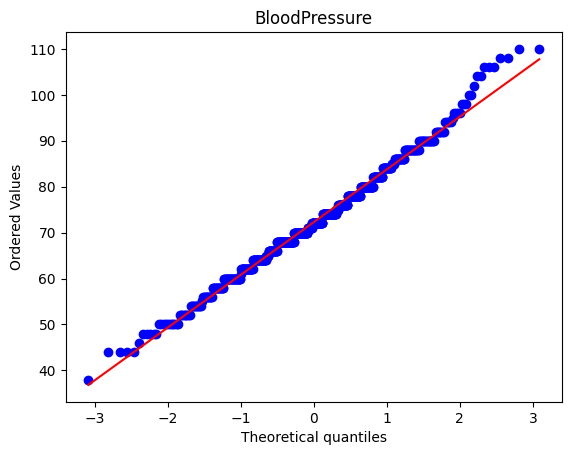

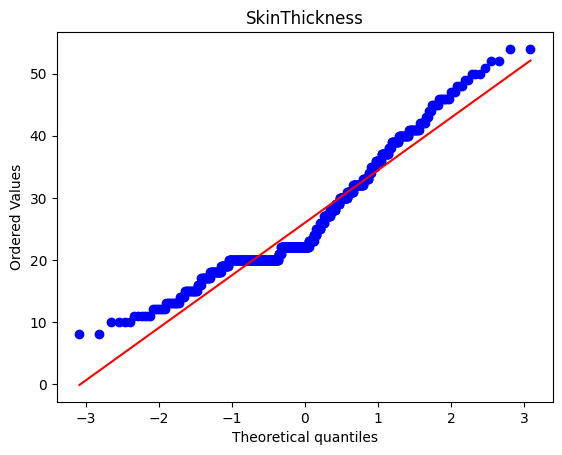

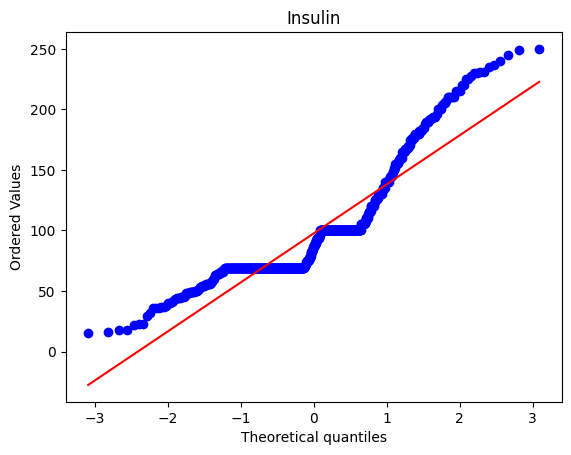

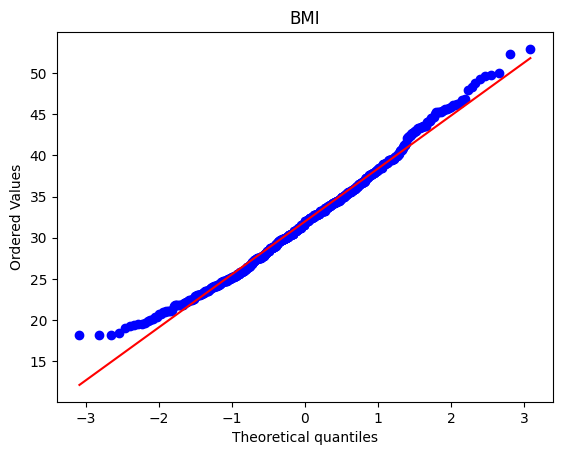

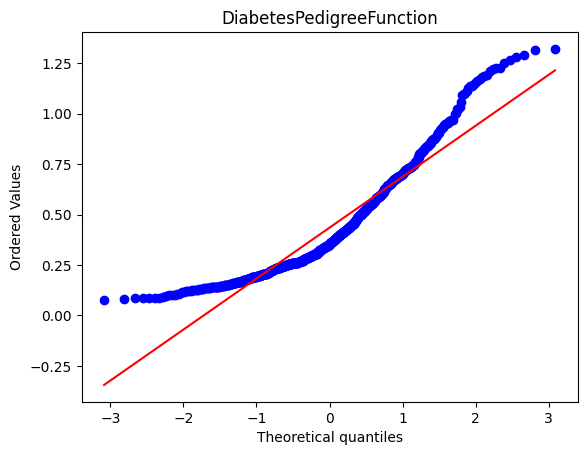

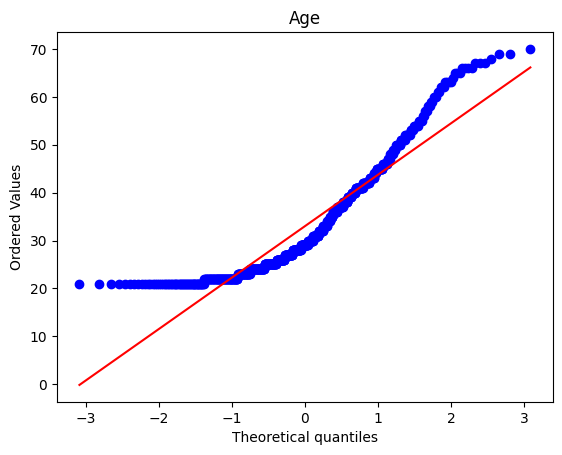

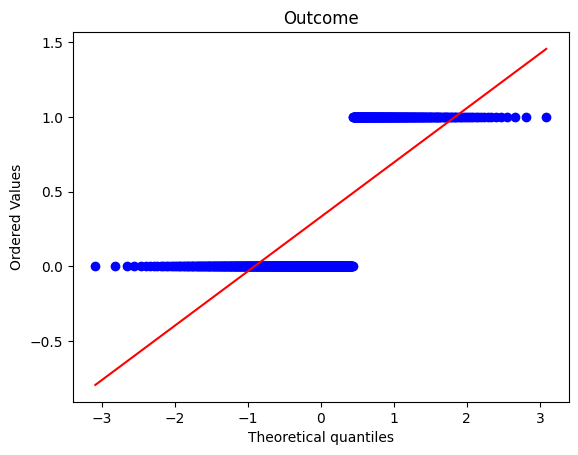

In [28]:
for i in data.columns:
    plt.figure()
    stats.probplot(data[i], plot = plt)
    plt.title(i)
    plt.show()

The skew() function calculates the skewness of a variable, which measures the degree of asymmetry in its distribution. A positive skewness indicates that the distribution has a longer tail on the right side, while a negative skewness indicates a longer tail on the left side.

In [29]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["Skewed"])
skewness

,Skewed
Insulin,1.310294
Age,1.106734
DiabetesPedigreeFunction,1.091226
Pregnancies,0.851667
SkinThickness,0.799969
Outcome,0.721109
Glucose,0.593040
BMI,0.359424
BloodPressure,0.261389


# Model Performance Analysis
#### Confusion matrix and Classification Report

## Confusion Matrix 

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:

- True Positives : The cases in which we predicted YES and the actual output was also YES.
- True Negatives : The cases in which we predicted NO and the actual output was NO.
- False Positives : The cases in which we predicted YES and the actual output was NO.
- False Negatives : The cases in which we predicted NO and the actual output was YES.
The Confusion matrix in itself is not a performance measure as such, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside it.


## Classification Report
##### Precision Score:

    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)
    
##### Recall Score

    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

##### F1 Score

    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

#### Implementing OverSampling Technique for Handling Imbalanced data

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       138
           1       0.79      0.93      0.85        68

    accuracy                           0.89       206
   macro avg       0.87      0.90      0.88       206
weighted avg       0.90      0.89      0.90       206



<Axes: >

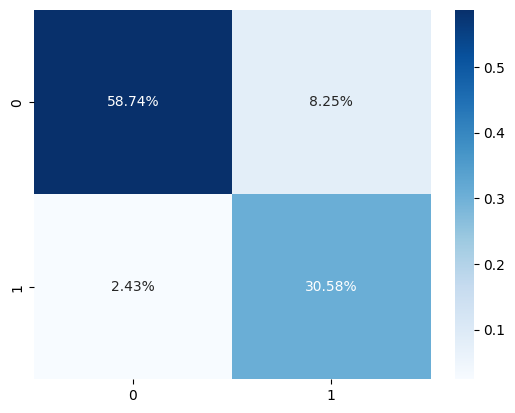

In [30]:
#Libraries
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

X = data.drop("Outcome", axis = 1)
y = data.Outcome

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Perform oversampling using SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


# Train the XGBoost classifier
classifier = XGBClassifier(random_state=42, n_estimators=10000, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, objective='binary:logistic')
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

- After performing the data cleaning, handling outliers and appling oversampling - SMOTE method, The accuracy is stable before and after.

## ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or not). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [32]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

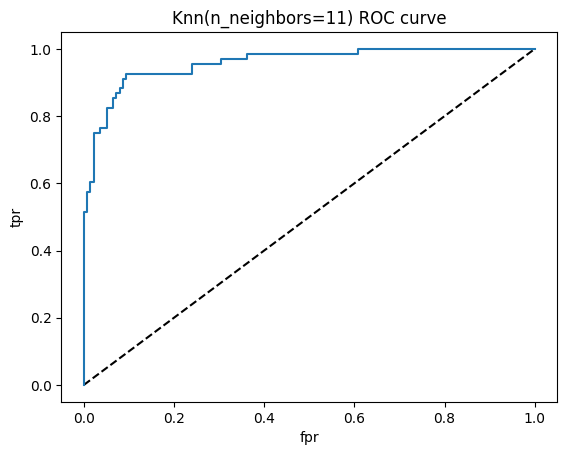

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [34]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9585464620630861

## Scaling Techniques

- Trying to use 2 types of scaling techiques

    1. Standard Scaler: mean of 0 and a standard deviation of 1
               z = (x - mean) / std
    2. RobustScaler: a transformation method that scales the data by subtracting the median and dividing by the interquartile range (IQR)
              z = (x - median) / IQR

In [35]:
scaler = StandardScaler()
SSX_train = scaler.fit_transform(X_train)
SSX_test = scaler.transform(X_test)


Rscaler =  RobustScaler()
RSX_train = Rscaler.fit_transform(X_train)
RSX_test = Rscaler.transform(X_test)

train_test = [SSX_train, RSX_train, SSX_test, RSX_test]

###  Machine learning classification Modles with hyperparameter Tunning

In [36]:
# Import Support Vector Machine Classification models
from sklearn.svm import SVC

# Import Logistic Regression Models
from sklearn.linear_model import LogisticRegression

# Import K-Nearest Neighbors(KNN) Models
from sklearn.neighbors import KNeighborsClassifier

# Import Decision Tree Classification Models
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest Classification Models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
ResultML_Data = pd.DataFrame(columns = ["Model_Name", "SS_Score", "RS_Score"])

In [38]:
Model_Name = ["SVC","LR","KNN","DTC","RFC","XGB"] # Abridgment Names of Models 
ResultML_Data["Model_Name"] = Model_Name

In [39]:
ResultML_Data

,Model_Name,SS_Score,RS_Score
0,SVC,NaN,NaN
1,LR,NaN,NaN
2,KNN,NaN,NaN
3,DTC,NaN,NaN
4,RFC,NaN,NaN
5,XGB,NaN,NaN


## Support Vector Machine Classification

In [40]:
for i in range(2):
    svc = SVC()

    p_svc = [
        {'C': [1, 2, 3, 4, 5], 'kernel': ['linear']},
        {'C': [1, 2, 3, 4, 5], 'kernel': ['rbf'], 'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
        {'C': [1, 2, 3, 4, 5], 'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6, 7], 'gamma': [1, 0.5, 0.1, 0.01, 0.001]}
    ]

    grid = GridSearchCV(estimator=svc, param_grid=p_svc, scoring="accuracy", cv=4)
    grid.fit(train_test[i], y_train)
    y_pred_svc = grid.predict(train_test[i+2])

    best_param_grid = grid.best_params_
    best_score_grid = grid.best_score_

    print("Best parameter of GridSearchCV: ", best_param_grid)
    print("Best score of GridSearchCV: ", best_score_grid)

    if (i == 0):
        ResultML_Data["SS_Score"][0] = accuracy_score(y_pred_svc,y_test)
    else:
        ResultML_Data["RS_Score"][0] = accuracy_score(y_pred_svc,y_test)

Best parameter of GridSearchCV:  {'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Best score of GridSearchCV:  0.8828125
Best parameter of GridSearchCV:  {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Best score of GridSearchCV:  0.878125


## Logistic Regression 

In [41]:
for i in range(2):
    log_reg = LogisticRegression(random_state=0)

    param_grid_lr = {"penalty": ["l1", "l2"],
                     "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "multi_class": ["auto", "ovr", "multinomial"]}

    grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, scoring="accuracy", cv=4)
    grid_search_lr.fit(train_test[i], y_train)

    best_params_lr = grid_search_lr.best_params_
    best_score_lr = grid_search_lr.best_score_

    y_pred_lr = grid_search_lr.predict(train_test[i + 2])

    print("Best parameters of logistic regression model from GridSearch: ", best_params_lr)
    print("Best score of logistic regression model from GridSearch: ", best_score_lr)

    if i == 0:
        ResultML_Data["SS_Score"][1] = accuracy_score(y_pred_lr, y_test)
    else:
        ResultML_Data["RS_Score"][1] = accuracy_score(y_pred_lr, y_test)


Best parameters of logistic regression model from GridSearch:  {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Best score of logistic regression model from GridSearch:  0.765625
Best parameters of logistic regression model from GridSearch:  {'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Best score of logistic regression model from GridSearch:  0.765625


## K-Nearest Neighbors(KNN) ¶

In [42]:
# Loop through two sets of data
for i in range(2):
    # Define hyperparameters to test for KNeighborsClassifier
    p_knn = {
        "n_neighbors": range(1, 100),
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "p": [1, 2]
    }
    
    # Create a KNeighborsClassifier instance and perform GridSearchCV to find the best hyperparameters
    knn_grid = KNeighborsClassifier()
    grid_knn = GridSearchCV(estimator=knn_grid, param_grid=p_knn, scoring="accuracy", cv=4)
    grid_knn_search = grid_knn.fit(train_test[i], y_train)
    y_pred_grid_knn = grid_knn.predict(train_test[i+2])

    # Extract the best hyperparameters and the best score found by GridSearchCV
    best_parm_grid_knn = grid_knn_search.best_params_
    best_score_grid_knn = grid_knn_search.best_score_

    # Print the results
    print("Best hyperparameters found by GridSearchCV for KNeighborsClassifier: ", best_parm_grid_knn)
    print("Best score found by GridSearchCV for KNeighborsClassifier: ", best_score_grid_knn)

    # Save the score to the appropriate column in the results dataframe
    if i == 0:
        ResultML_Data["SS_Score"][2] = accuracy_score(y_pred_grid_knn, y_test)
    else:
        ResultML_Data["RS_Score"][2] = accuracy_score(y_pred_grid_knn, y_test)


Best hyperparameters found by GridSearchCV for KNeighborsClassifier:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best score found by GridSearchCV for KNeighborsClassifier:  0.8734375
Best hyperparameters found by GridSearchCV for KNeighborsClassifier:  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best score found by GridSearchCV for KNeighborsClassifier:  0.8859375


## Decision Tree Classification

In [43]:
for i in range(2):
    p_dtc = {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_features": ["auto", "sqrt", "log2"]
    }
    
    grid_dtc = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid=p_dtc,
        scoring="accuracy",
        cv=4
    ).fit(train_test[i], y_train)
    
    y_pred_grid_dtc = grid_dtc.predict(train_test[i+2])
    
    best_parm_grid_dtc = grid_dtc.best_params_
    best_score_grid_dtc = grid_dtc.best_score_
    
    # Print the best hyperparameters found by the GridSearchCV for DecisionTreeClassifier
    print("Best parameters found by GridSearchCV for DecisionTreeClassifier: ", best_parm_grid_dtc)
    # Print the best score found by the GridSearchCV for DecisionTreeClassifier
    print("Best score found by GridSearchCV for DecisionTreeClassifier: ", best_score_grid_dtc)
    
    score_key = "SS_Score" if i == 0 else "RS_Score"
    ResultML_Data[score_key][3] = accuracy_score(y_pred_grid_dtc, y_test)


Best parameters found by GridSearchCV for DecisionTreeClassifier:  {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}
Best score found by GridSearchCV for DecisionTreeClassifier:  0.8828125
Best parameters found by GridSearchCV for DecisionTreeClassifier:  {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
Best score found by GridSearchCV for DecisionTreeClassifier:  0.8765625


## Random Forest Classification 

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the grid of hyperparameters to search over
param_grid = {"n_estimators": range(1, 50),
              "criterion": ["gini", "entropy", "gini"],
              "max_features": ["sqrt", "log2", None],
              "class_weight": ["balanced", "balanced_subsample"]}

# Loop over two iterations
for i in range(2):
    # Create a random forest classifier
    rfc = RandomForestClassifier()

    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring="accuracy", cv=4)
    grid_search.fit(train_test[i], y_train)

    # Get the best hyperparameters and the corresponding accuracy score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the results
    print(f"Best hyperparameters for iteration {i}: {best_params}")
    print(f"Best accuracy score for iteration {i}: {best_score}")

    # Compute the accuracy score of the best model on a test set
    y_pred = grid_search.predict(train_test[i + 2])
    score = accuracy_score(y_pred, y_test)

    # Store the result in a dictionary
    if i == 0:
        ResultML_Data["SS_Score"][4] = score
    else:
        ResultML_Data["RS_Score"][4] = score


Best hyperparameters for iteration 0: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 32}
Best accuracy score for iteration 0: 0.9171875
Best hyperparameters for iteration 1: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 32}
Best accuracy score for iteration 1: 0.915625


## XGB classifier

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the hyperparameter distribution to search over
param_dist = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'learning_rate': np.linspace(0.01, 0.3, 30),
              'n_estimators': np.arange(10, 500, 10),
              'gamma': np.linspace(0, 1, 11),
              'subsample': np.linspace(0.5, 1, 6),
              'colsample_bytree': np.linspace(0.1, 1, 10)}

# Loop over two iterations
for i in range(2):
    # Create an XGBoost classifier
    xgb = XGBClassifier()

    # Perform randomized search cross-validation to find the best hyperparameters
    random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=50,
                                       scoring="accuracy", n_jobs=-1, cv=4, random_state=42)
    random_search.fit(train_test[i], y_train)

    # Get the best hyperparameters and the corresponding accuracy score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    # Print the results
    print(f"Best hyperparameters for iteration {i}: {best_params}")
    print(f"Best accuracy score for iteration {i}: {best_score}")

    # Compute the accuracy score of the best model on a test set
    y_pred = random_search.predict(train_test[i + 2])
    score = accuracy_score(y_pred, y_test)

    # Store the result in a dictionary
    if i == 0:
        ResultML_Data["SS_Score"][5] = score
    else:
        ResultML_Data["RS_Score"][5] = score


Best hyperparameters for iteration 0: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.25999999999999995, 'gamma': 1.0, 'colsample_bytree': 0.8}
Best accuracy score for iteration 0: 0.903125
Best hyperparameters for iteration 1: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.25999999999999995, 'gamma': 1.0, 'colsample_bytree': 0.8}
Best accuracy score for iteration 1: 0.903125


## Machine Learning Model Assessment 

In [47]:
ResultML_Data

,Model_Name,SS_Score,RS_Score
0,SVC,0.84466,0.859223
1,LR,0.752427,0.752427
2,KNN,0.825243,0.830097
3,DTC,0.825243,0.839806
4,RFC,0.917476,0.902913
5,XGB,0.907767,0.907767


Text(0.5, 1.0, 'Result with StandartScaler')

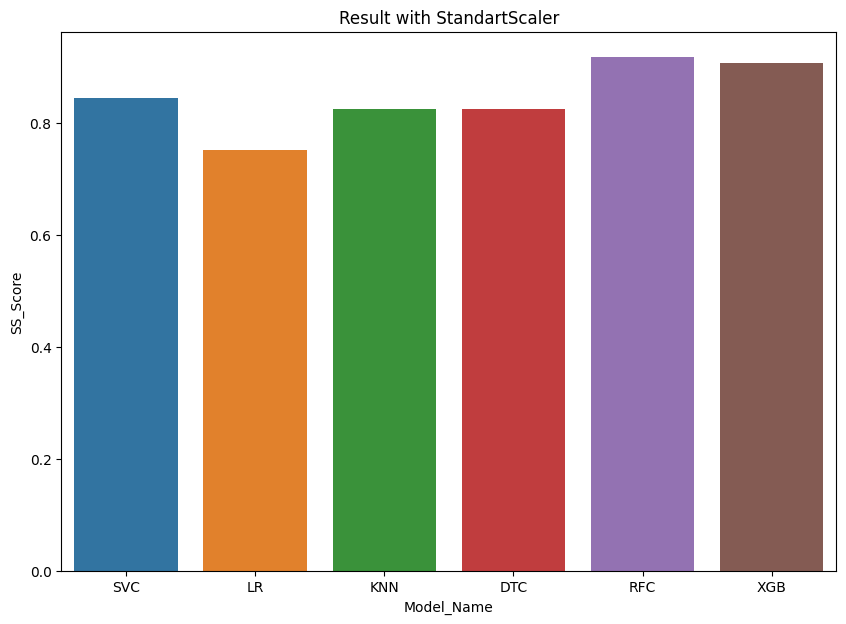

In [48]:
plt.figure(figsize=(10,7))
sns.barplot(x=ResultML_Data["Model_Name"], y=ResultML_Data["SS_Score"])
plt.xticks(rotation=0)
plt.xlabel("Model_Name")
plt.ylabel("SS_Score")
plt.title("Result with StandartScaler")

Text(0.5, 1.0, 'Result with RobustScaler')

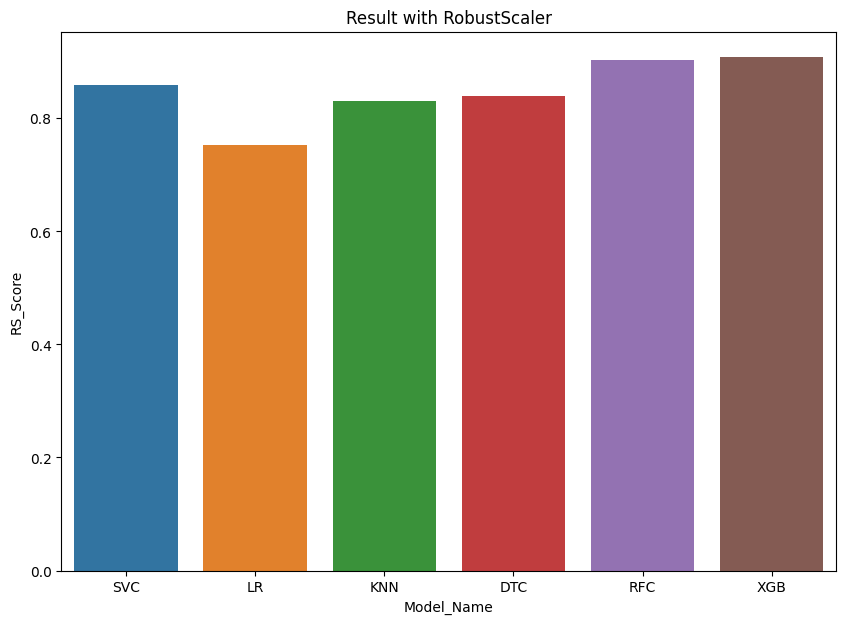

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(x=ResultML_Data["Model_Name"], y=ResultML_Data["RS_Score"])
plt.xticks(rotation=0)
plt.xlabel("Model_Name")
plt.ylabel("RS_Score")
plt.title("Result with RobustScaler")

## Making a Predctive analysis (Model Deployment)

Model deployment is the process of putting machine learning models into production. This makes the model’s predictions available to users, developers or systems, so they can make business decisions based on data, interact with their application

#### Non-Daibetic patient predictive anlysis

In [50]:
input_data = (1,89,66,23,94,28.1,167,21)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = random_search.predict(std_data)
print(prediction)

[[-9.98425822e-01 -1.12762623e+00 -6.05137883e-01 -3.63941054e-01
  -2.05355811e-01 -7.36192825e-01  6.40735855e+02 -1.23353569e+00]]
[0]


In [51]:
if (prediction[0]== 0):
    print('The person is Non-Daibetic')
else:
    print('The person is Diabetic')

The person is Non-Daibetic


####  Diabetic patient predictive analysis

In [52]:
input_data = (3,158,76,36,245,31.6,851,28)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = random_search.predict(std_data)
print(prediction)

[[-3.67010282e-01  1.10657937e+00  2.67722710e-01  1.20415297e+00
   3.21924911e+00 -1.59627509e-01  3.27198463e+03 -5.77056727e-01]]
[1]


In [53]:
if (prediction[0]== 0):
    print('The person is Non-Daibetic')
else:
    print('The person is Diabetic')

The person is Diabetic


# Saving the Trained Model

In [54]:
import pickle

In [55]:
filename = 'Diabetes_model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))

In [56]:
# loading the saved model
loaded_model = pickle.load(open('Diabetes_model.pkl', 'rb'))

In [57]:
pickle.dump(scaler, open('Diabetes_scaler.pkl', 'wb'))

In [58]:
input_data = (1,89,66,23,94,28.1,167,21)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0]== 0):
    print('The person is Non-Daibetic')
else:
    print('The person is Diabetic')

[[-9.98425822e-01 -1.12762623e+00 -6.05137883e-01 -3.63941054e-01
  -2.05355811e-01 -7.36192825e-01  6.40735855e+02 -1.23353569e+00]]
[0]
The person is Non-Daibetic


# Conclusion
The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section; data for: The NaN values missing observations were filled with the mean values of whether each variable was sick or not. The outliers were determined and dropped. The X variables were standardized with the rubost method and standard scaler.

4) During Model Building; Logistic Regression, KNN, SVM, Random Forests, XGBoost, Decision Tree like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost hyperparameter optimizations optimized to increase Cross Validation value.

5) Result; The model created as a result of RFC, XGB hyperparameter optimization became the model with the highest Cross Validation Score value. (is about 0.90)

